In [2]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

In [3]:
#A function that you can pass in any data from data sources,it will standardize the format into index:date,columns:Index Name,Index Columns
#Nake sure you take a look at your data before doing the function and find out which index you want to keep as the Index Value.Keep contains two columns and the first is always 'Index Name'
def standardata(dataset,name,keep=['Index Name']):
    quandl.ApiConfig.api_key = "z2y5P4Yhy1YFZARoYStN"
    df1=quandl.get(dataset)
    df1.insert(loc=0,column='Index Name',value=name)
    for col in df1.columns:
        if col not in keep:
            df1.drop(columns=[col],inplace=True)
    df1.columns=['Index Name','Index Value']
    return df1

In [4]:
nasdaq=standardata('NASDAQOMX/XQC',name='Nasdaq',keep=['Index Name','Index Value'])
nasdaq

,Index Name,Index Value
Trade Date,,
2016-12-19,Nasdaq,4934.85
2016-12-20,Nasdaq,4953.80
2016-12-21,Nasdaq,4948.90
2016-12-22,Nasdaq,4934.39
2016-12-23,Nasdaq,4940.02
...,...,...
2020-07-20,Nasdaq,10952.08
2020-07-21,Nasdaq,10833.07
2020-07-22,Nasdaq,10870.75


In [7]:
misery=standardata('USMISERY/INDEX',name='Misery',keep=['Index Name','Misery Index'])
misery

,Index Name,Index Value
Date,,
1948-01-31,Misery,13.63
1948-02-29,Misery,13.10
1948-03-31,Misery,10.85
1948-04-30,Misery,12.58
1948-05-31,Misery,12.63
...,...,...
2020-01-31,Misery,6.09
2020-02-29,Misery,5.83
2020-03-31,Misery,5.94


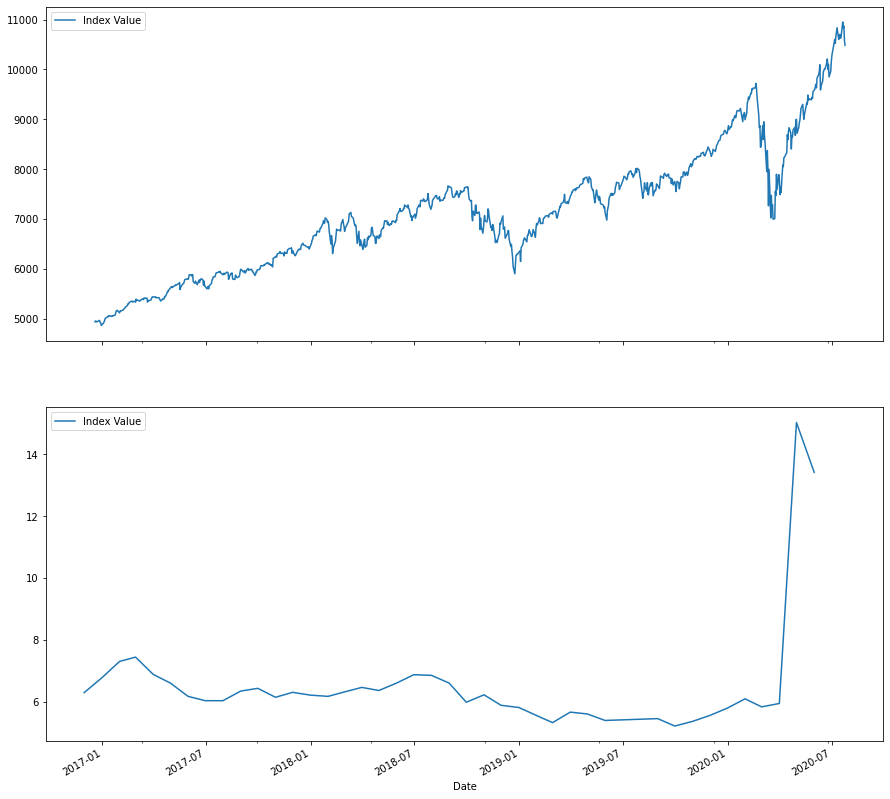

In [20]:
#Plot the two datasets from 2016-11-30 since we could only extract Nasdaq index from 2016-12-19.
#We could briefly tell that nasdaq index and US misery index may have an inverse relationship by looking at data before and after April 2020
#Before April 2020,US misery index were decreasing while nasdaq index were increasing. However,on April 2020, US misery index had a sudden increase from 6 to 15(Maybe due to COVID-19)
#And nasdaq index had a tremendous decrease. We still need dataset comparasion to support our hypothesis. 
misery1=misery.loc['2016-11-30':]
fig,axes=plt.subplots(2,1,figsize=(15,15),sharex=True)
nasdaq.plot(ax=axes[0])
misery1.plot(ax=axes[1])

In [33]:
jointable=nasdaq.merge(misery,how='inner',left_index=True,right_index=True,suffixes=('_nasdaq','_misery'))
jointable.drop(columns=['Index Name_nasdaq','Index Name_misery'],inplace=True)
jointable.corr()
#jointable.cov()

,Index Value_nasdaq,Index Value_misery
Index Value_nasdaq,1.00000,0.20897
Index Value_misery,0.20897,1.00000
